In [9]:
import numpy as np 
import cv2
import math
import matplotlib.pyplot as plt
from numpy import linalg 

In [10]:
# GAUSSIAN FILTER CREATED FROM SCRATCH WITH VARIABLE SIZE,k, AND VARIABLE STANDARD DEVIATION,sigma
def gaussian_blur(image,k,sigma):
    A = 0 
    mid = int((k-1)/2)
    matrix = np.zeros((k,k))
    for i in range(k):
        for j in range(k):
            temp = math.exp(-((((i-k)**2) + ((j-k)**2))/(2*(sigma**2))))
            A+=temp
            matrix[i,j] = temp
    matrix =matrix/A
    a = cv2.filter2D(image,-1,matrix)
    return a

# sobel filter created from scratch. edge_type=0 implies horizontal sobel. edge_type=1 implies vertical sobel. 
def sobel_filter(image,edge_type):
    if edge_type==0:
        kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]]) # covers dark to bright transition edges
        kernel_1 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]]) # covers bright to dark transition edges
    if edge_type==1:
        kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
        kernel_1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    edges = cv2.filter2D(image,-1,kernel)
    edges_1 = cv2.filter2D(image,-1,kernel_1)
    for i in range(edges.shape[0]):
        for j in range(edges.shape[1]):
            if np.argmax(np.array([abs(edges[i,j]),abs(edges_1[i,j])]))==1: # find the max between kernel and kernel_1
                edges[i,j] = edges_1[i,j]
    return (abs(edges)>=120)*np.ones(edges.shape)*edges*(1/8) #absolute thresholding to avoid noise


In [11]:
#image can be either RGB or grayscale
#k is the size of the gaussian filter applied
#sigma is the corresponding standard-deviation of the gaussian filter
def harris_corners(image_path,k,sigma):
    image = cv2.imread(image_path)
    if len(image.shape)==3:                           #if the image is coloured
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #conversion of BGR to RGB
        image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)#RGB to grayscale
    i_g = gaussian_blur(image,k,sigma)                #gaussian blur applied to the images
    i_x = sobel_filter(image,0)                       #horizontal sobel filter
    i_y = sobel_filter(image,1)                       #horizontal sobel filter
    i_xx = i_x*i_x                                    #calculating i_x**2
    i_yy = i_y*i_y                                    #calculating i_y**2
    i_xy = i_x*i_y                                    #calculating i_x*i_y
    i_xx_ = gaussian_blur(i_xx,k,sigma)               #performing gaussian blur
    i_yy_ = gaussian_blur(i_yy,k,sigma)
    i_xy_ = gaussian_blur(i_xy,k,sigma)
    corners = np.zeros(image.shape)                   #initialization of corners
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            M = np.array([[i_xx_[i,j],i_xy_[i,j]],[i_xy_[i,j],i_yy_[i,j]]]) #formation of the M matrix
            w,_ = linalg.eig(M)                                             #finding the eigen values
            R =  w[0]*w[1] - (0.06*((w[0]+w[1])**2))                        #finding R based on the eigenvalues
            if R<=0:                                                        #putting edges to zero
                corners[i,j] = 0
            else:                                                         
                corners[i,j] = R                                            #based on R value giving weight to the corner
    return np.uint8(corners)                                                #normalising to 255
            

RUN THE CODE IN THE BELOW CELL

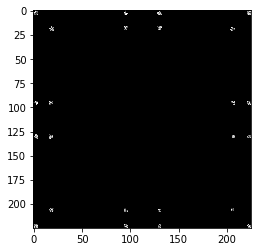

True

In [13]:
img = harris_corners('/home/chennuri/chennuri_prateek/COURSES/3D_CV/assignment-1/harris_corner_detection/result1/input.png',3,3)
plt.imshow(img,cmap='gray')
plt.show()
#img = gaussian_blur(img,3,1)
cv2.imwrite('ABC.png',img)


BUILT-IN


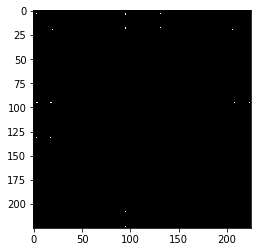

True

In [14]:
image = cv2.imread('/home/chennuri/chennuri_prateek/COURSES/3D_CV/assignment-1/harris_corner_detection/result1/input.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
gray =cv2.cornerHarris(gray,2,5,0.06)

gray = (((gray/gray.max())*255)>120)*np.ones(gray.shape)*255
gray = np.uint8(gray)
plt.imshow(gray,cmap='gray')
plt.show()
cv2.imwrite('result5.png',gray)